## Analyze A/B Test Results


We will be collaborating on a project that involves analyzing the outcomes of an A/B test conducted by an e-commerce website. The objective is to work through a notebook to assist the company in determining whether they should implement the new page, retain the old page, or potentially extend the experiment duration to arrive at a conclusive decision.


### Import needed Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo.


Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.

In [3]:
# (a) Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:
df = pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [4]:
# (b) Display number of rows in dataset
df.shape

(294478, 5)

In [5]:
# (c) Display number of unique values in each column
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [6]:
# (d) Compute proportion of users converted
len(df[df['converted']==1])/len(df)
# or df.converted.mean()

0.11965919355605512

In [7]:
# (e) ComputeThe number of times when the "group" is treatment but "landing_page" is not a new_page.
df.shape[0] - df.query("group == 'treatment' & landing_page == 'new_page'").shape[0] 

149167

In [8]:
# (f) Compute number of rows where group and landing_page don't match
len(df.query('group == "treatment" and landing_page == "old_page"')) + len(df.query('group == "control" and landing_page == "new_page"')) 

3893

In [9]:
# Display number of null in each column of dataset
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**No Missing Values, so nullable rows is not exist**

In [10]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
i = df.query("group == 'treatment' & landing_page == 'old_page'").index
df.drop(i, inplace = True)
i = df.query("group == 'control' & landing_page == 'new_page'").index
df.drop(i, inplace = True)
df2= df

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

**So it's correct**

In [12]:
#Check numbers the location of repeated id
df2['user_id'][df2['user_id'].duplicated()]

2893    773192
Name: user_id, dtype: int64

In [13]:
df2[df2['user_id'].isin(df2['user_id'][df2['user_id'].duplicated()])].sort_values('user_id')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [14]:
# Drop duplicated id
df2.drop_duplicates(inplace = True)

In [15]:
df.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [16]:
# compute the propotrion of users converted
(df2['converted']== 1).mean()

0.11959667567149027

In [18]:
m_old = df2[df2['group'] == 'control'].converted.mean()
m_old

0.1203863045004612

In [19]:
m_new= df2[df2['group'] == 'treatment'].converted.mean()
m_new

0.11880724790277405

In [20]:
# compute the propotrion of users converted from treatment group
len(df2[(df2['converted']==1) & (df['group'] =='treatment')])/len(df2[df2['group'] =='treatment'].index)

0.11880724790277405

In [21]:
# compute the proportion of landing the new page 
(df2['landing_page']== 'new_page').mean()

0.5000636646764286

In [22]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = m_new - m_old
obs_diff

-0.0015790565976871451

In [24]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


### Findings
**No the treatment group users don't lead to more conversions.**

There is no sufficient evidence that the new page leads to more conversions, as 50% of users landed the new page and the other 50% landed the old one.
Additionally, the probability of conversions given that an individual was in the control group is .12, and the probability of conversions given that an individual was in the treatment group is .118, which indicates that there is a subtle difference between the 2 probabilities.

## Part II - A/B Test
**Null hypothesis** : proportion of conversions from old page is greater than or equal to conversions from new page.  
**Alternative hypothesis** : proportion of conversions from new page is greater than conversions from old page.  
**$H_{0}$** : 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 <=0  
**$H_{1}$** : 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 >0

In [25]:
# Compute conversion rate for pnew under null hypothesis as the null hupothesis assume that the conversion rate of new page is equal to conversion rate of old page
p_new = (df2['converted']== 1).mean()
p_new

0.11959667567149027

In [26]:
# Compute conversion raete for pold under null hypothesis
p_old = (df2['converted']== 1).mean()
p_old

0.11959667567149027

In [27]:
# Compute number of users landed new page
n_new = len(df2[df2['landing_page']== 'new_page'])
n_new

145311

In [28]:
# Compute number of users landed new page
n_old = len(df2[df2['landing_page']== 'old_page'])
n_old

145274

In [31]:
# Simulate users landed new page with conversion rate for new page
P_new_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
P_new_converted.mean()

0.12067221339058984

In [32]:
#simulate users landed old page with conversion rate for old page 
P_old_converted = np.random.choice([1,0],size=n_old, p=[p_old, (1-p_old)])
P_old_converted.mean()

0.11960846400594738

In [33]:
#calculate difference betweem observations of new page and old page under the null hypothhesis
P_new_converted.mean() - P_old_converted.mean()

0.0010637493846424595

In [37]:
#simulate distribution of difference between new page and old page under the null hypothhesis
p_diff = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diff = new_converted_simulation - old_converted_simulation
print(p_diff)

[-0.00064285 -0.00182703  0.00191733 ...  0.00111894 -0.00224659
  0.00135989]


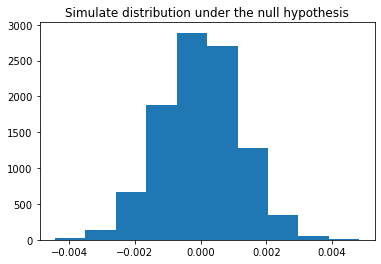

In [38]:
#create histogram of the normal distribution of difference between new page and old page
plt.hist(p_diff);
plt.title('Simulate distribution under the null hypothesis');

In [39]:
# Compute p_value
obs_diff = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
obs_diff

-0.0015790565976871451

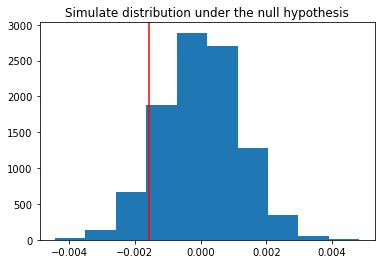

In [40]:
plt.hist(p_diff);
plt.title('Simulate distribution under the null hypothesis');
plt.axvline(x=obs_diff, color='red');

In [41]:
(p_diff > obs_diff).mean()


0.9071

### Findings
This indicates that the distribution of difference between the new page and the old page under the null hypothesis is 90% greater than the observed difference, which is a high p-value, as a result, the new page isn't significantly better than the old page, hence we fail to reject the null hypothesis.

In [42]:
# Display number of converted users landed new page
convert_new = len(df2.query('converted == 1 & landing_page == "new_page"'))
convert_new

17264

In [43]:
# Display number of converted users landed new page
convert_old = len(df2.query('converted == 1 & landing_page == "old_page"'))
convert_old

17489

In [44]:
# Dispaly number of users landed new page
n_new = len(df2.query('landing_page == "new_page"'))
n_new

145311

In [46]:
# Dispaly number of users landed new page
n_old = len(df2.query('landing_page == "old_page"'))
n_old

145274

In [47]:
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.3116075339133115 0.905173705140591


### Findings
P-value is 90.5%, which indicates that the conversion rate from the old page is greater than or equal to the conversion rate from the new page.
This means that we fail to reject null hypothesis.

## Part III - A regression approach

**Logestic regression is the suitable regression model to perform this case.**


**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [48]:
# Create intercept
df2['intercept'] = 1

# Create dumm varaible for pages recevied by different groups
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [50]:
log_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [52]:
# Summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sat, 08 Jul 2023   Pseudo R-squ.:               8.085e-06
Time:                        16:28:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

### Findings
P-value associated with ab_page is .19, while p-value in Part II is .90.
According to this p-value, ab_page is not a significant coefficient of whether or not the user converts.

Now, we are considering other things that might influence whether or not an individual converts.
We will test if the conversion rate changes for different pages, also add an effect based on which country a user lives.

### Wait!!

Now, you are considering other things that might influence whether or not an individual converts. Discuss why it is a good idea to consider other factors to add into your regression model. Are there any disadvantages to adding additional terms into your regression model?

**These factors might influence whether or not an individual converts:**

- The country he lives in.
- The rate of the item.
- The reliability.
- The income
- The martial status.


**It is not a good idea to add other factors because Multicollinearity might occur "Relationship between factors".**

In [54]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [55]:
df_new.shape[0]

290585

In [58]:
### Create the necessary dummy varibles
#create dummy variables for country having UK baseline
df_new[['US','CA']] = pd.get_dummies(df_new['country'])[['US','CA']]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,CA
user_id,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,1,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,1,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,1,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,1,0


In [59]:
df_new['country'].unique()

array(['US', 'UK', 'CA'], dtype=object)

In [60]:
### Fit Your Linear Model And Obtain the Results
#create intercept
df_new['intercept'] = 1

#create logistic regression model
logit_model = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'CA']])

#fit model
result = logit_model.fit()

#display summary of model
result.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Sat, 08 Jul 2023   Pseudo R-squ.:               2.324e-05
Time:                        16:35:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.414      0.000      -2.004      -1.954
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
US            -0.0099      0.013     -0.744      0.457      -0.036       0.016
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
==============================================================================
"""

### Findinngs
* P-value for countries is higher than .05, hence countries have no significant influence on conversion rates, however, the p_value for California is close to .05, so it may represent a significant coefficient.

In [61]:
#create new column of interaction between US and ab_page
df_new['US_ab_page'] = df_new['ab_page'] * df_new['US']

#create new column of interaction between CA and ab_page
df_new['CA_ab_page'] = df_new['ab_page'] * df_new['CA']

#display sample of new data
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,CA,US_ab_page,CA_ab_page
user_id,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,1,0,1,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,1,0,1,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,1,0,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,1,0,1,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,1,0,1,0


In [63]:
#create intercept
df_new['intercept'] = 1

#create logistic regression model
model = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'CA','US_ab_page','CA_ab_page']])

#fit model
result = model.fit()

#display summary of model
result.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Sat, 08 Jul 2023   Pseudo R-squ.:               3.483e-05
Time:                        16:39:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
US             0.0057      0.019      0.306      0.760      -0.031       0.043
CA            -0.0118      0.040     -0.296      0.767      -0.090       0.066
US_ab_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
CA_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
==============================================================================
"""

In [64]:
np.exp(0.0314)

1.0318981806179213

In [66]:
1/np.exp(result.params)

intercept     7.331806
ab_page       0.989224
US            0.994272
CA            1.011854
US_ab_page    1.031907
CA_ab_page    1.081428
dtype: float64

>**Both interaction p values are greater than 0.05 this means that the users from US and CA don't influence in conversion rate or the countries don't influence in conversion rate.**

## Conclusions
* P-value for countries is higher than .05, hence countries have no significant influence on conversion rates.
* P-value for interactions is higher than .05, which suggests that there is no significant influence of landing pages in the US and Canada on conversion rates.
* The results of this test suggest that the new page doesn't have a higher conversion rate than the old page, so the company shouldn't implement the new page.

**Now we are sure that there is no difference between the conversion rate at the old page and the new page and the sample didn't small so the development should continue.**